# Amazon Reviews Unlocked Mobile Phones

In [1]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100
from wordcloud import WordCloud
import sqlite3
import nltk
import string
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

path = 'C:/Users/rmalshe/Desktop/CareerDevelopment/PROGRAMMING_LANGUAGES/iPythonNoteBooks/AMAZON_UNLOCKED_MOBILE/'

# Read the data

In [2]:
data = pd.read_csv(path + 'Amazon_Unlocked_Mobile.csv', encoding='utf-8')
df = data
df.columns = ['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews', 'ReviewVotes']
df.head().T

0  \
ProductName                                                                                                                                                                                                                                                                               "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN   
BrandName                                                                                                                                                                                                                                                                                                                                                                                   Samsung   
Price                                                                                                                                                                                                                                                                                                                                                                                        199.99   
Rating                                                                                                                                                                                                                                                                                                                                                                                            5   
Reviews      I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!   
ReviewVotes                                                                                                                                                                                                                                                                                                                                                                                       1   

                                                                                                                                                                                                                                  1  \
ProductName                                                                                                               "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN   
BrandName                                                                                                                                                                                                                   Samsung   
Price                                                                                                                                                                                                                        199.99   
Rating                                                                                                                                                                                                                            4   
Reviews      nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung   
ReviewVotes                                                                                                                                                                                                                       0   

                              

# Describe the data

In [3]:
data.columns

Index([u'ProductName', u'BrandName', u'Price', u'Rating', u'Reviews',
       u'ReviewVotes'],
      dtype='object')

In [4]:
data.head(n=2)

ProductName  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN   

  BrandName   Price  Rating  \
0   Samsung  199.99       5   
1   Samsung  199.99       4   

                                                                                                                                                                                                                                                                                                                                                                                  Reviews  \
0  I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!   
1                                                                                                                                                                  nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung   

   ReviewVotes  
0          1.0  
1          0.0

In [5]:
df['Price'] = df['Price'].fillna(0)
df['ReviewVotes'] = df['ReviewVotes'].fillna(0)
data.describe()

Price         Rating    ReviewVotes
count  413840.000000  413840.000000  413840.000000
mean      223.614684       3.819578       1.462454
std       272.380590       1.548216       9.030315
min         0.000000       1.000000       0.000000
25%        78.000000       3.000000       0.000000
50%       139.950000       5.000000       0.000000
75%       269.100000       5.000000       1.000000
max      2598.000000       5.000000     645.000000

# Categorical features

In [6]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['ProductName', 'BrandName', 'Reviews'], dtype=object)

# Numerical Features

In [7]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['Price', 'Rating', 'ReviewVotes'], dtype=object)

# How many Brands exist? 

In [8]:
len(list(set(df['BrandName'])))

385

# How many unique products exist? 

In [9]:
len(list(set(df['ProductName'])))

4410

# Pivot tables

In [10]:
pivot = pd.pivot_table(df,
            values = ['Rating', 'ReviewVotes'],
            index = ['BrandName'], 
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True).fillna('')
pivot.head(10)

sum                  mean              \
                        Rating ReviewVotes    Rating ReviewVotes   
BrandName                                                          
AKUA                      20.0         0.0  5.000000    0.000000   
AMM Global Enterprises    44.0         1.0  4.888889    0.111111   
ARGOM TECH                 6.0         0.0  3.000000    0.000000   
ASUS                    2165.0       838.0  4.482402    1.734990   
ASUS Computers          2896.0       831.0  4.027816    1.155772   
AT&T                       5.0         0.0  5.000000    0.000000   
ATT                      160.0        25.0  3.636364    0.568182   
Acer                      68.0        27.0  3.090909    1.227273   
Aeku                      10.0         8.0  5.000000    4.000000   
AeroAntenna                5.0         0.0  5.000000    0.000000   

                       count_nonzero                   std              
                              Rating ReviewVotes    Rating ReviewVotes  
BrandName                                                               
AKUA                             4.0         0.0         0           0  
AMM Global Enterprises           9.0         1.0  0.333333    0.333333  
ARGOM TECH                       2.0         0.0   2.82843           0  
ASUS                           483.0       185.0   1.07074     4.75457  
ASUS Computers                 719.0       228.0   1.38608     6.63478  
AT&T                             1.0         0.0                        
ATT                             44.0        17.0   1.79263    0.974028  
Acer                            22.0        14.0   1.71573     1.37778  
Aeku                             2.0         1.0         0     5.65685  
AeroAntenna                      1.0         0.0

# Which are the top 10 prominent brands?
And how many ratings do they have?  

In [11]:
pivot = pd.pivot_table(df,
            values = ['Rating', 'ReviewVotes'],
            index =  ['BrandName'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
top_10_brands = pivot.reindex().head(n=11)
top_10_brands

sum                  mean             count_nonzero  \
               Rating ReviewVotes    Rating ReviewVotes        Rating   
BrandName                                                               
All         1330128.0    499722.0  3.814873    1.433228      348669.0   
Samsung      260513.0     97903.0  3.962356    1.489087       65747.0   
BLU          239853.0     58430.0  3.792262    0.923824       63248.0   
Apple        228346.0    112280.0  3.924415    1.929674       58186.0   
LG            86114.0     23070.0  3.841460    1.029130       22417.0   
BlackBerry    63126.0     21114.0  3.741465    1.251422       16872.0   
Nokia         64187.0     25964.0  3.819291    1.544924       16806.0   
Motorola      51157.0     23107.0  3.812849    1.722218       13417.0   
HTC           44094.0     12803.0  3.465420    1.006209       12724.0   
CNPGD         39176.0     20151.0  3.106002    1.597637       12613.0   
OtterBox      35022.0      2276.0  4.383778    0.284892        7989.0   

                             std              
           ReviewVotes    Rating ReviewVotes  
BrandName                                     
All           102770.0  1.545507    9.056848  
Samsung        18602.0  1.485313    9.783997  
BLU            15985.0  1.502263    5.439966  
Apple          18388.0  1.576060   13.010956  
LG              5912.0  1.534323    5.013116  
BlackBerry      4058.0  1.599935    7.642110  
Nokia           5530.0  1.490946    7.745235  
Motorola        4392.0  1.524914   15.037728  
HTC             3184.0  1.660243    5.437551  
CNPGD           3502.0  1.618294    8.857163  
OtterBox         743.0  1.164561    2.602952

# Lets extract data only for top 10 brands. 

In [12]:
top_10_brands = top_10_brands.reset_index()
tt_brand = top_10_brands['BrandName']
tt_brand2 = tt_brand.reset_index()
top_10_brand_list = list(set(tt_brand2['BrandName']))
top_10_brand_list.remove('All')

In [13]:
top_10_brand_list

[u'LG',
 u'Motorola',
 u'HTC',
 u'Apple',
 u'Samsung',
 u'BLU',
 u'Nokia',
 u'OtterBox',
 u'BlackBerry',
 u'CNPGD']

In [14]:
df_small=df.loc[df['BrandName'].isin(top_10_brand_list)]
pivot = pd.pivot_table(df_small,
            values = ['Rating'],
            index =  ['BrandName'], 
                       columns= [],
                       aggfunc=[np.mean, np.std], 
                       margins=True, fill_value=0).sort_values(by=('mean', 'Rating'), ascending=False).fillna('')
pivot

mean       std
              Rating    Rating
BrandName                     
OtterBox    4.383778  1.164561
Samsung     3.962356  1.485313
Apple       3.924415  1.576060
LG          3.841460  1.534323
All         3.832811  1.540667
Nokia       3.819291  1.490946
Motorola    3.812849  1.524914
BLU         3.792262  1.502263
BlackBerry  3.741465  1.599935
HTC         3.465420  1.660243
CNPGD       3.106002  1.618294

# How do average ratings look like for top 10 brands? 

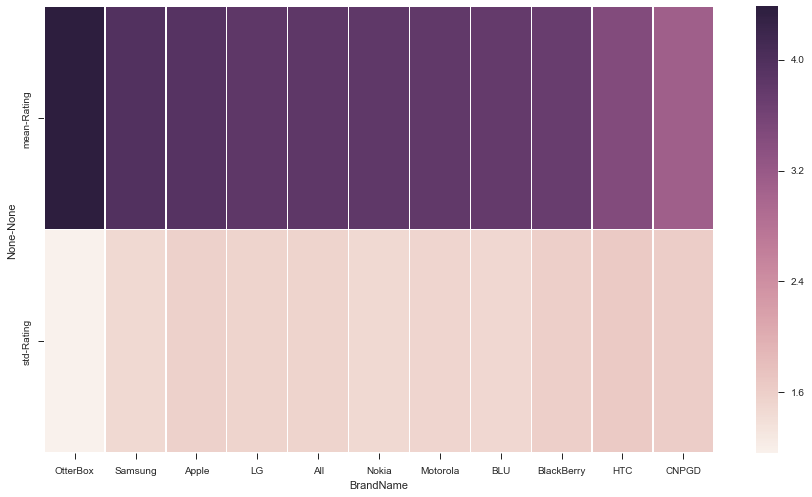

In [15]:
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (15, 8))
sns.heatmap(pivot.T,linewidths=0.2,xticklabels=True, yticklabels=True)

# Lets find out their topmost products: For 10 Brands, what are top 10 products?

In [16]:
df_small.columns.values

array(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'], dtype=object)

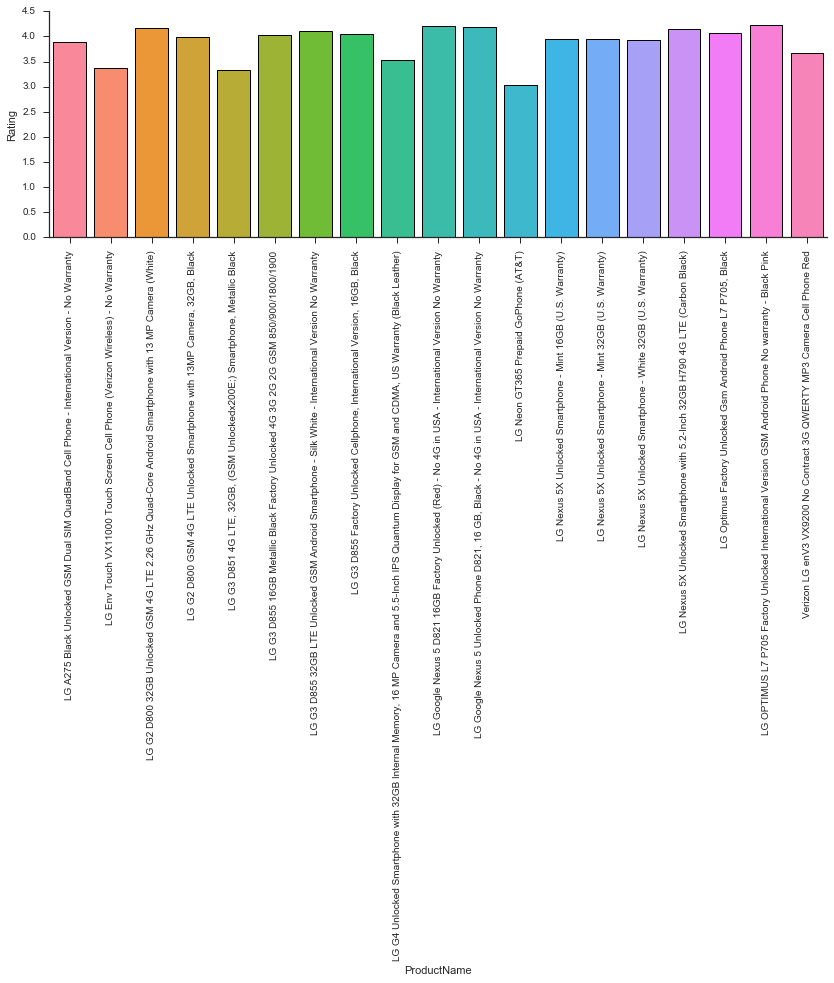

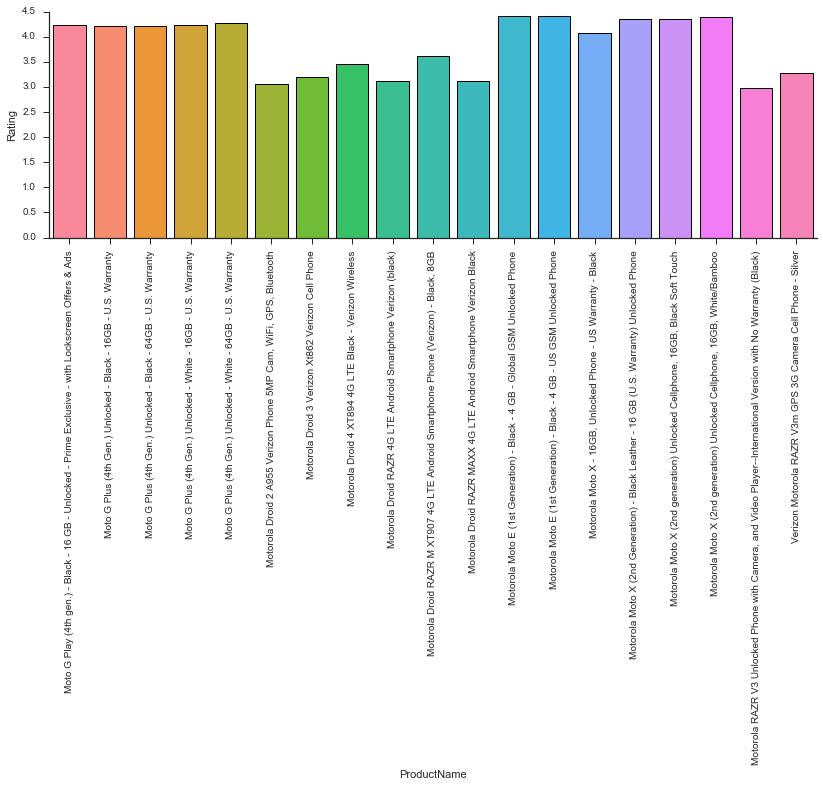

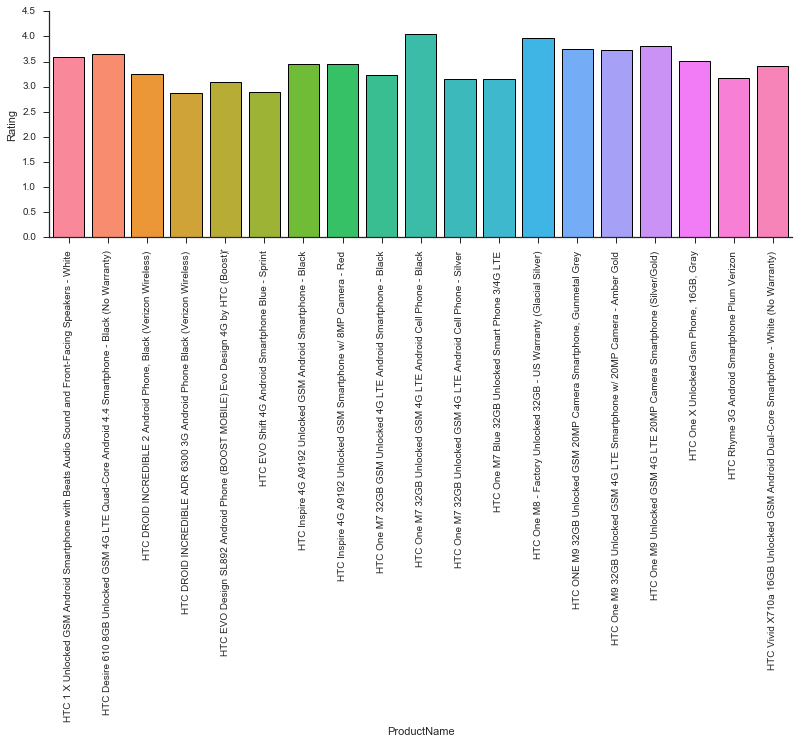

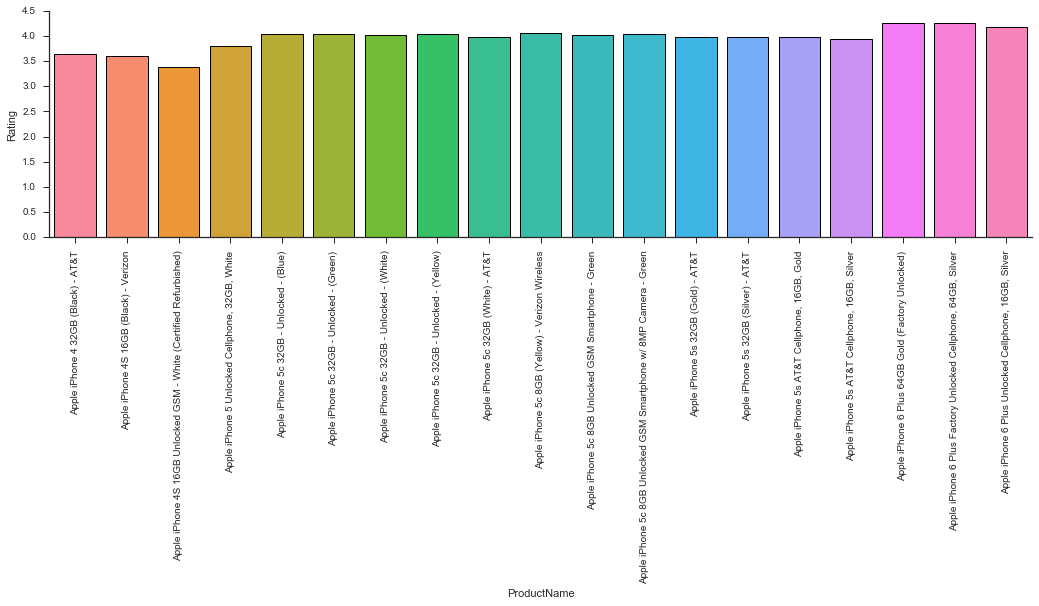

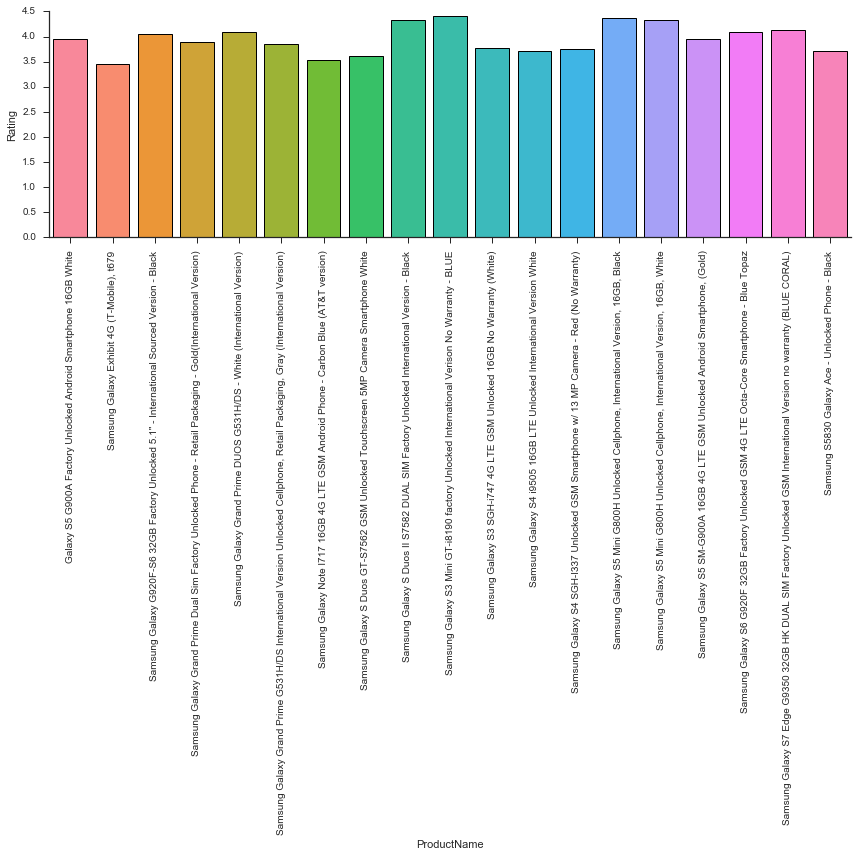

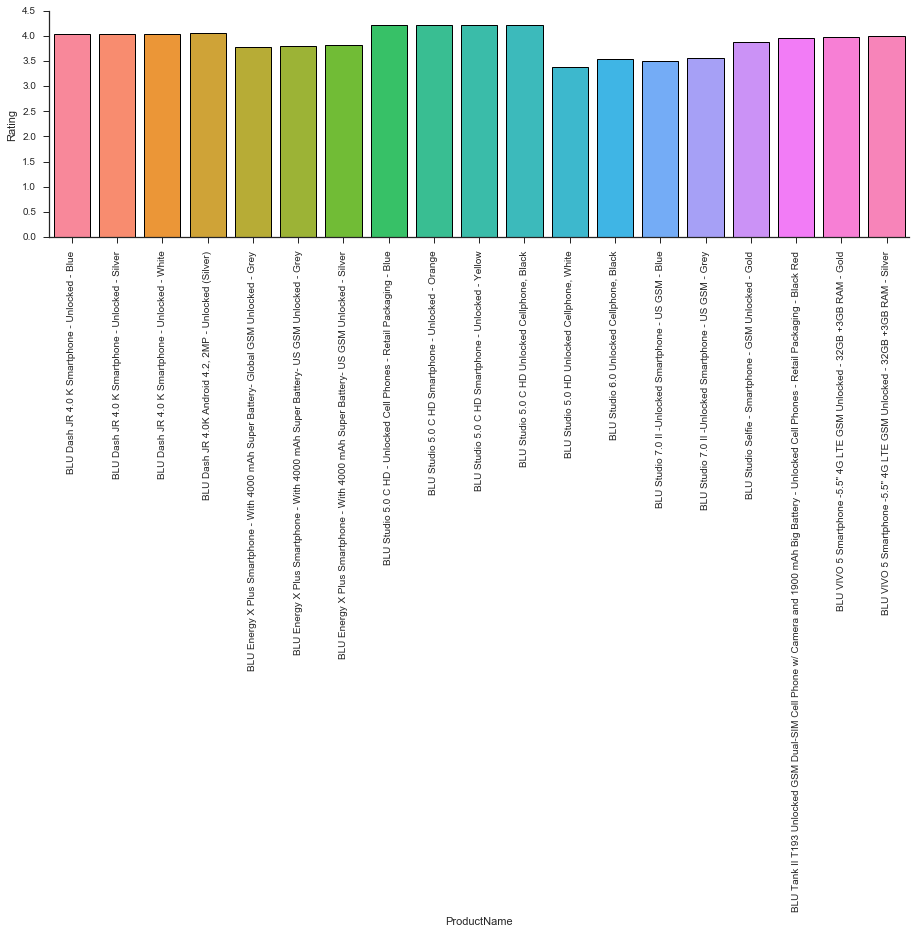

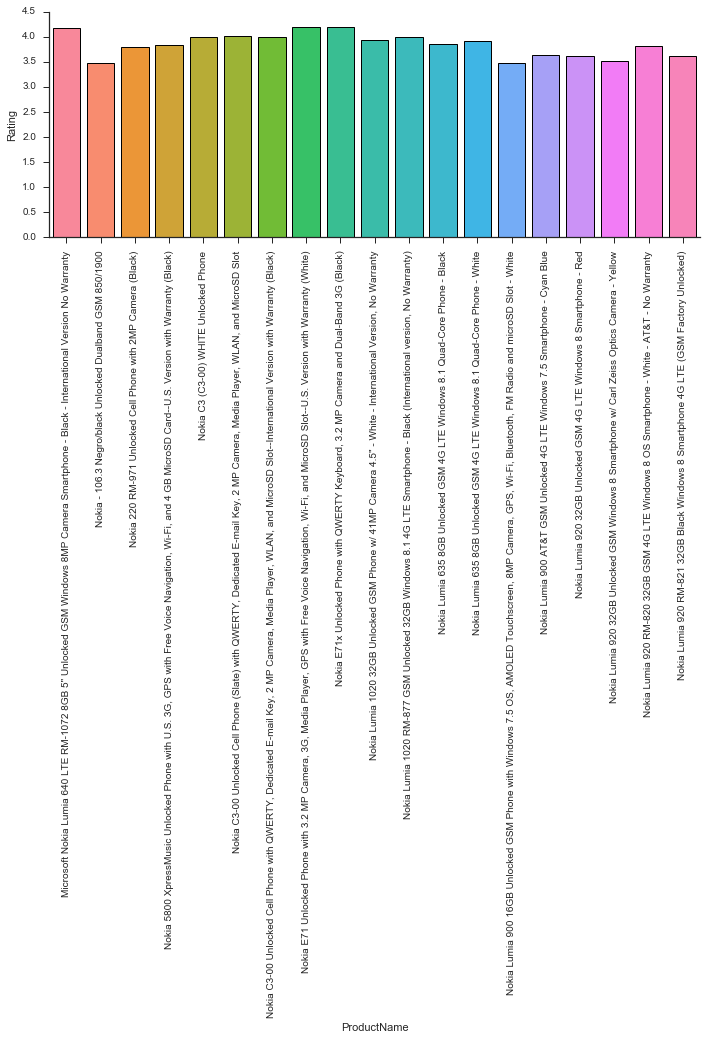

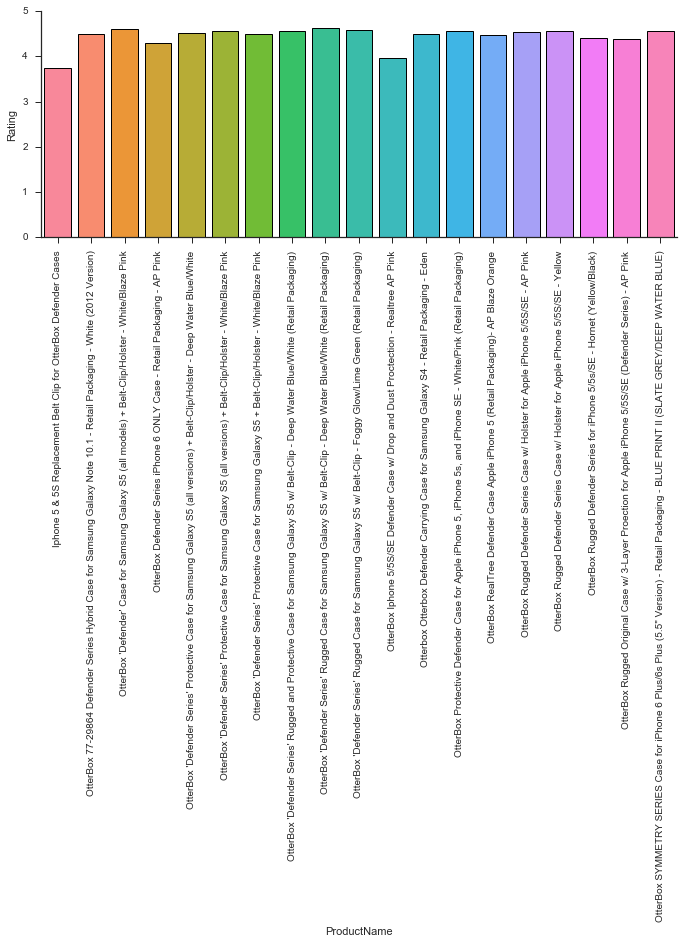

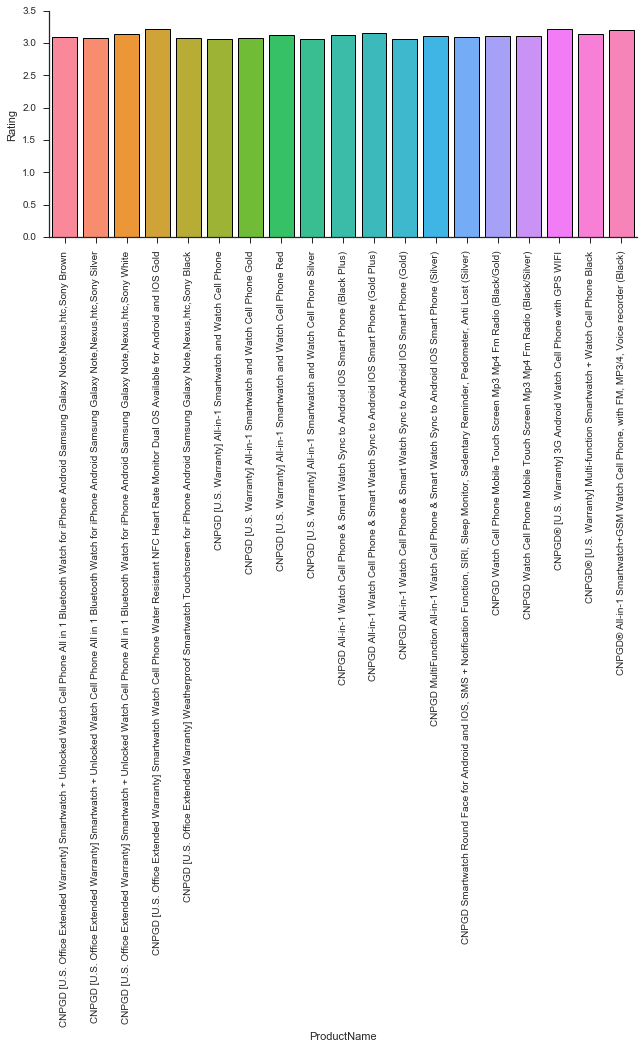

In [17]:
def plot_one_company(company, n=20):
    df_one_company = df_small.loc[df_small['BrandName'].isin([company])]
    pivot = pd.pivot_table(df_one_company,
            values = ['Rating', 'ReviewVotes'],
            index =  ['ProductName'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
    top_10_prods = pivot.reindex().head(n=20)
    top_10_prods = top_10_prods.reset_index()
    tt_prods = top_10_prods['ProductName']
    tt_prods2 = tt_prods.reset_index()
    top_10_prods_list = list(set(tt_prods2['ProductName']))
    #top_30_prod_list

    try:
        aa= df_one_company[df_one_company['ProductName'].isin(top_10_prods_list)]
        g = sns.factorplot(x='ProductName', 
                           y='Rating',
                           data=aa, 
                           saturation=1, 
                           kind="bar", 
                           ci=None, 
                           aspect=4, 
                           linewidth=1) 
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
    except: 
        pass
        
for i in top_10_brand_list:
    plot_one_company(i, 20)
    

# Correlations

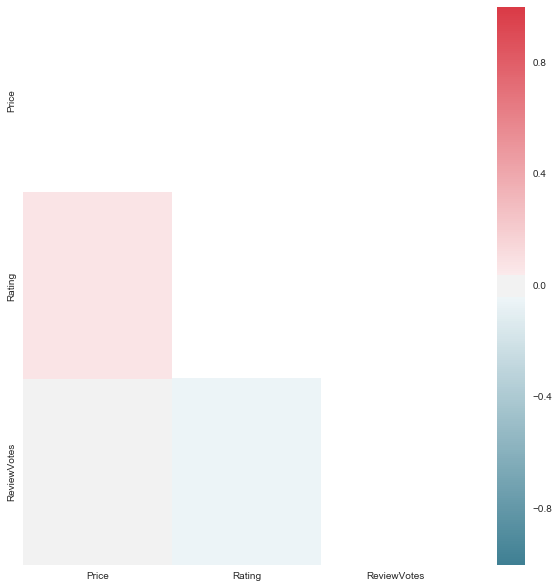

In [18]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10, 10))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

In [19]:
df.columns.values

array(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'], dtype=object)

# How are review votes distributed for different prices and different ratings? 

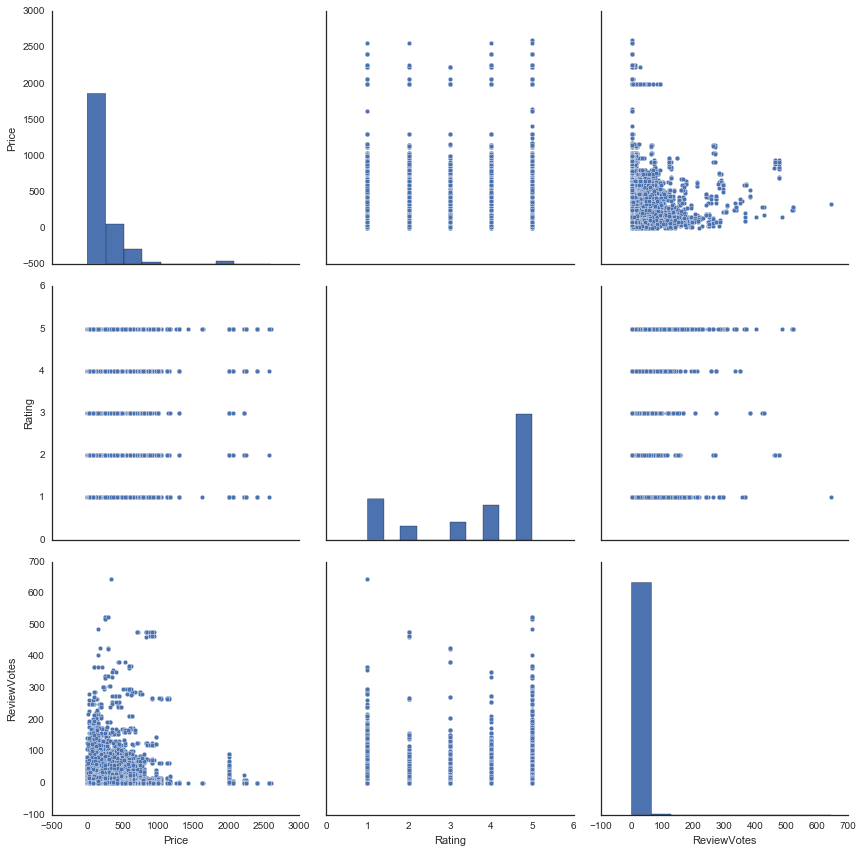

In [20]:
df_small = df[['BrandName', 
               'Price', 
               'Rating', 
               'ReviewVotes']]
sns.pairplot(df_small, size=4)

# Complex plots

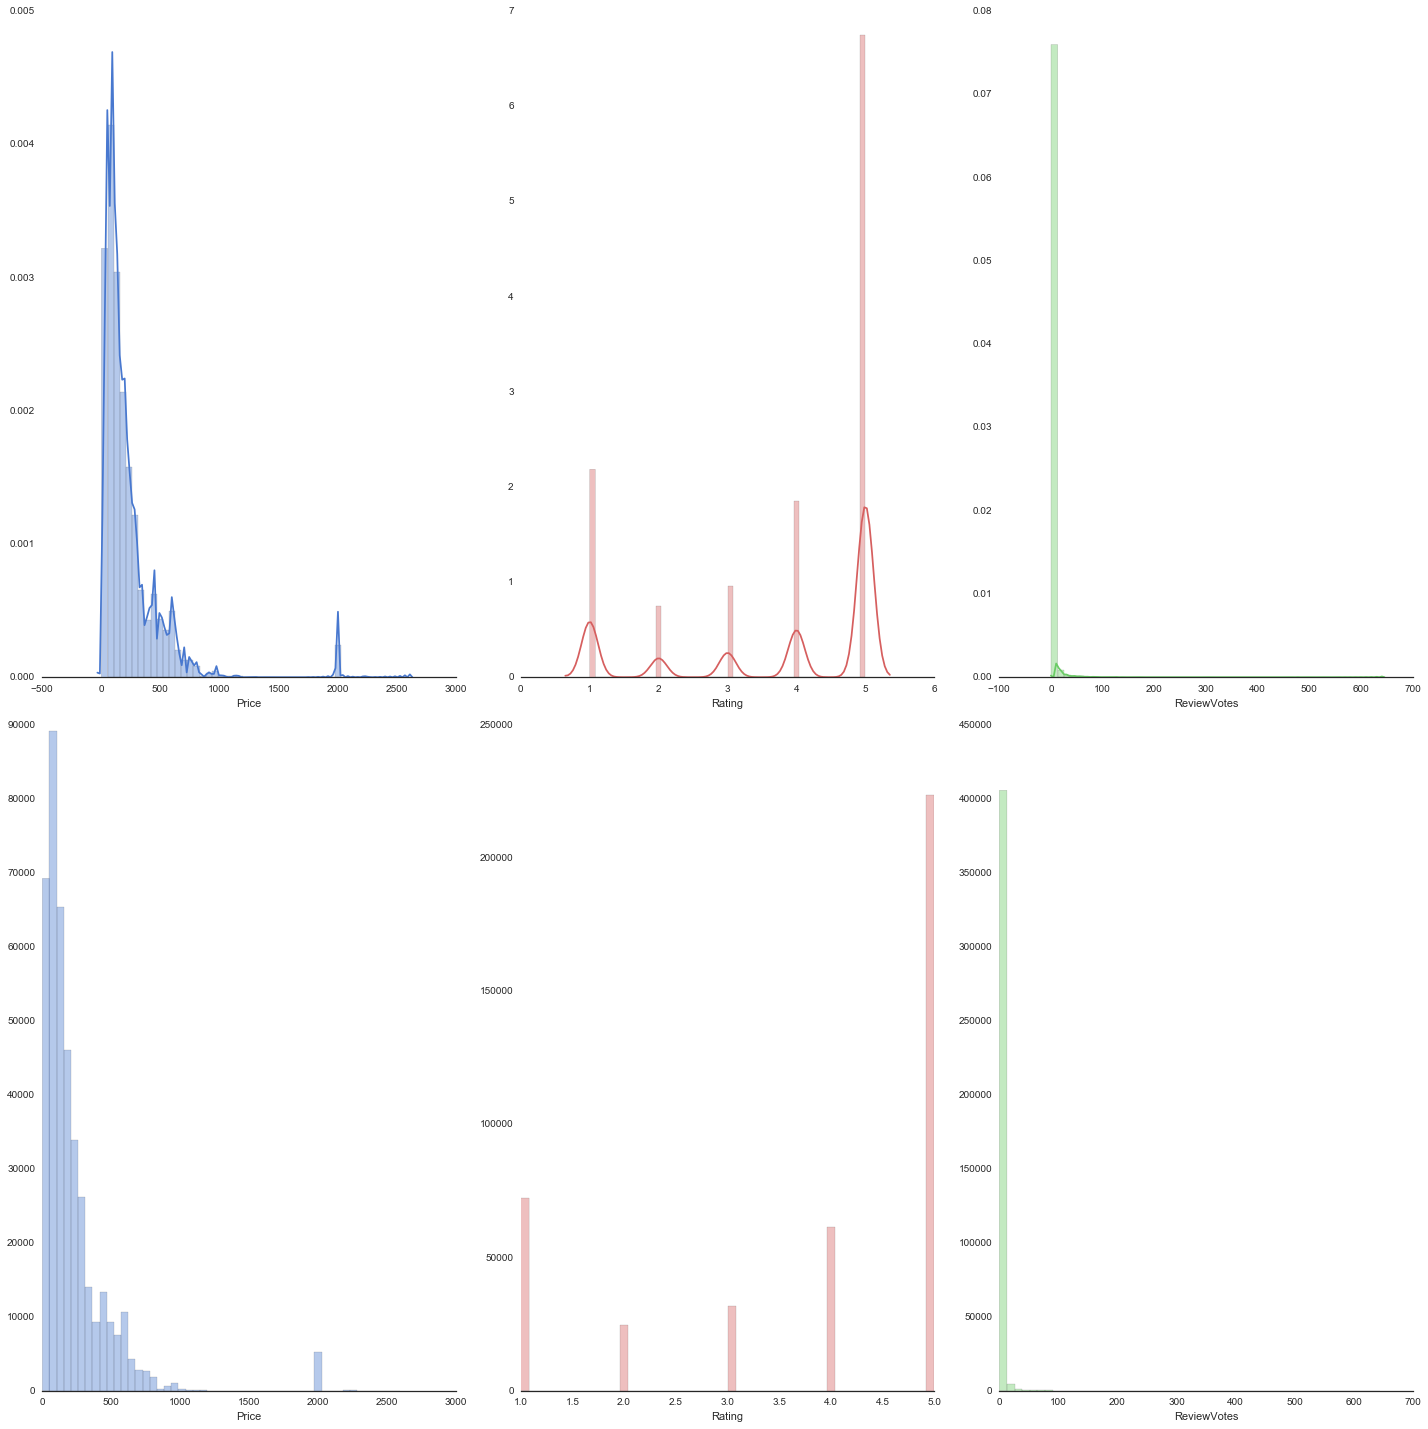

In [21]:
#data = df
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 3, figsize=(20,20))
sns.despine(left=True)
sns.distplot(df['Price'],            color="b", ax=axes[0, 0])
sns.distplot(df['Rating'],           color="r", ax=axes[0, 1])
sns.distplot(df['ReviewVotes'],      color="g", ax=axes[0, 2])
sns.distplot(df['Price'],            kde=False, color="b", ax=axes[1, 0])
sns.distplot(df['Rating'],           kde=False, color="r", ax=axes[1, 1])
sns.distplot(df['ReviewVotes'],      kde=False, color="g", ax=axes[1, 2])
#sns.distplot(df['hour'],                  kde=False, color="b", ax=axes[1, 2])
plt.tight_layout()

# What can we know about Apple, its products and ratings? 

In [22]:
df_apple = df.loc[df['BrandName'].isin(['Apple'])]
pivot = pd.pivot_table(df_apple,
        values = ['Rating', 'ReviewVotes'],
        index =  ['ProductName'],
                   columns= [],
                   aggfunc=[np.sum, np.mean, np.count_nonzero], 
                   margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
topmost_prods = pivot.reindex().head(n=30)
topmost_prods = topmost_prods.reset_index()
topmost_prods


ProductName  \
                                                                                          
0                                                                                   All   
1                                                  Apple iPhone 5s 32GB (Silver) - AT&T   
2                                          Apple iPhone 5s AT&T Cellphone, 16GB, Silver   
3                     Apple iPhone 4S 16GB Unlocked GSM - White (Certified Refurbished)   
4                                                    Apple iPhone 5s 32GB (Gold) - AT&T   
5                                                    Apple iPhone 4 32GB (Black) - AT&T   
6                                                Apple iPhone 4S 16GB (Black) - Verizon   
7                                      Apple iPhone 6 Plus 64GB Gold (Factory Unlocked)   
8                                   Apple iPhone 5c 8GB Unlocked GSM Smartphone - Green   
9                                       Apple iPhone 5c 8GB (Yellow) - Verizon Wireless   
10                                           Apple iPhone 5s AT&T Cellphone, 16GB, Gold   
11                                       Apple iPhone 5 Unlocked Cellphone, 32GB, White   
12                                            Apple iPhone 5c 32GB - Unlocked - (White)   
13                                                  Apple iPhone 5c 32GB (White) - AT&T   
14                         Apple iPhone 6 Plus Factory Unlocked Cellphone, 64GB, Silver   
15                    Apple iPhone 5c 8GB Unlocked GSM Smartphone w/ 8MP Camera - Green   
16                                            Apple iPhone 5c 32GB - Unlocked - (Green)   
17                                             Apple iPhone 5c 32GB - Unlocked - (Blue)   
18                                 Apple iPhone 6 Plus Unlocked Cellphone, 16GB, Silver   
19                                           Apple iPhone 5c 32GB - Unlocked - (Yellow)   
20                                                  Apple iPhone 5c 16GB (Green) - AT&T   
21                                                   Apple iPhone 4 16GB (Black) - AT&T   
22                                       Apple iPhone 5s 64GB (Gold) - Verizon Wireless   
23  Apple iPhone 5 32GB Factory Unlocked GSM Cell Phone - Black (Certified Refurbished)   
24                                    Apple iPhone 5C 16GB White - Unlocked Cell Phones   
25         Apple Smart Watch Sport 38mm - Stainless Steel/White (Certified Refurbished)   
26                         Apple iPhone 3GS 8GB Black Factory Unlocked / Not Jailbroken   
27                                 Apple iPhone 5s 32GB (Space Gray) - Verizon Wireless   
28                                                Apple iPhone 4 32GB (White) - Verizon   
29                                       Apple iPhone 5 Unlocked Cellphone, 64GB, White   

         sum                  mean             count_nonzero              
      Rating ReviewVotes    Rating ReviewVotes        Rating ReviewVotes  
0   228346.0    112280.0  3.924415    1.929674       58186.0     18388.0  
1     4460.0      1557.0  3.989267    1.392665        1118.0       238.0  
2     4267.0      1315.0  3.950926    1.217593        1080.0       211.0  
3     3631.0      1693.0  3.390289    1.580766        1071.0       337.0  
4     4020.0      1405.0  3.980198    1.391089        1010.0       232.0  
5     3665.0      1496.0  3.639523    1.485601        1007.0       136.0  
6     3152.0      1386.0  3.606407    1.585812         874.0       165.0  
7     3615.0      1244.0  4.268005    1.468713         847.0       214.0  
8     3415.0      1100.0  4.031877    1.298701         847.0       239.0  
9     3206.0       949.0  4.068528    1.204315         788.0       213.0  
10    3103.0      1023.0  3.978205    1.311538         780.0       184.0  
11    2675.0       795.0  3.805121    1.130868         703.0       160.0  
12    2776.0       896.0  4.029028    1.300435         689.0       226.0  
13    2632.0       305.0  3.987879    

In [23]:
tt_brand = topmost_prods['ProductName']
tt_brand2 = tt_brand.reset_index()
top_10_prod_list = list(set(tt_brand2['ProductName']))
top_10_prod_list

[u'Apple iPhone 5 Unlocked Cellphone, 64GB, White',
 u'Apple Smart Watch Sport 38mm - Stainless Steel/White (Certified Refurbished)',
 u'Apple iPhone 5 32GB Factory Unlocked GSM Cell Phone - Black (Certified Refurbished)',
 u'Apple iPhone 5s 32GB (Silver) - AT&T',
 u'Apple iPhone 4 32GB (Black) - AT&T',
 u'Apple iPhone 5c 8GB (Yellow) - Verizon Wireless',
 u'Apple iPhone 4 16GB (Black) - AT&T',
 u'Apple iPhone 6 Plus 64GB Gold (Factory Unlocked)',
 u'Apple iPhone 5s 32GB (Space Gray) - Verizon Wireless',
 u'Apple iPhone 5c 8GB Unlocked GSM Smartphone - Green',
 u'Apple iPhone 5 Unlocked Cellphone, 32GB, White',
 u'Apple iPhone 5s AT&T Cellphone, 16GB, Silver',
 u'Apple iPhone 3GS 8GB Black Factory Unlocked / Not Jailbroken',
 u'Apple iPhone 4S 16GB (Black) - Verizon',
 u'Apple iPhone 6 Plus Factory Unlocked Cellphone, 64GB, Silver',
 u'Apple iPhone 5c 16GB (Green) - AT&T',
 u'Apple iPhone 5s 64GB (Gold) - Verizon Wireless',
 u'Apple iPhone 5C 16GB White - Unlocked Cell Phones',
 u'Appl

In [24]:
df_top_apple = df.loc[df['ProductName'].isin(top_10_prod_list)]
df_apple_prods = df_top_apple[['ProductName', 'BrandName', 'Price', 'Rating']]
df_apple_prods_dummies = pd.get_dummies(df_apple_prods)

In [25]:
mod_df_apple_corr = df_apple_prods_dummies.corr()

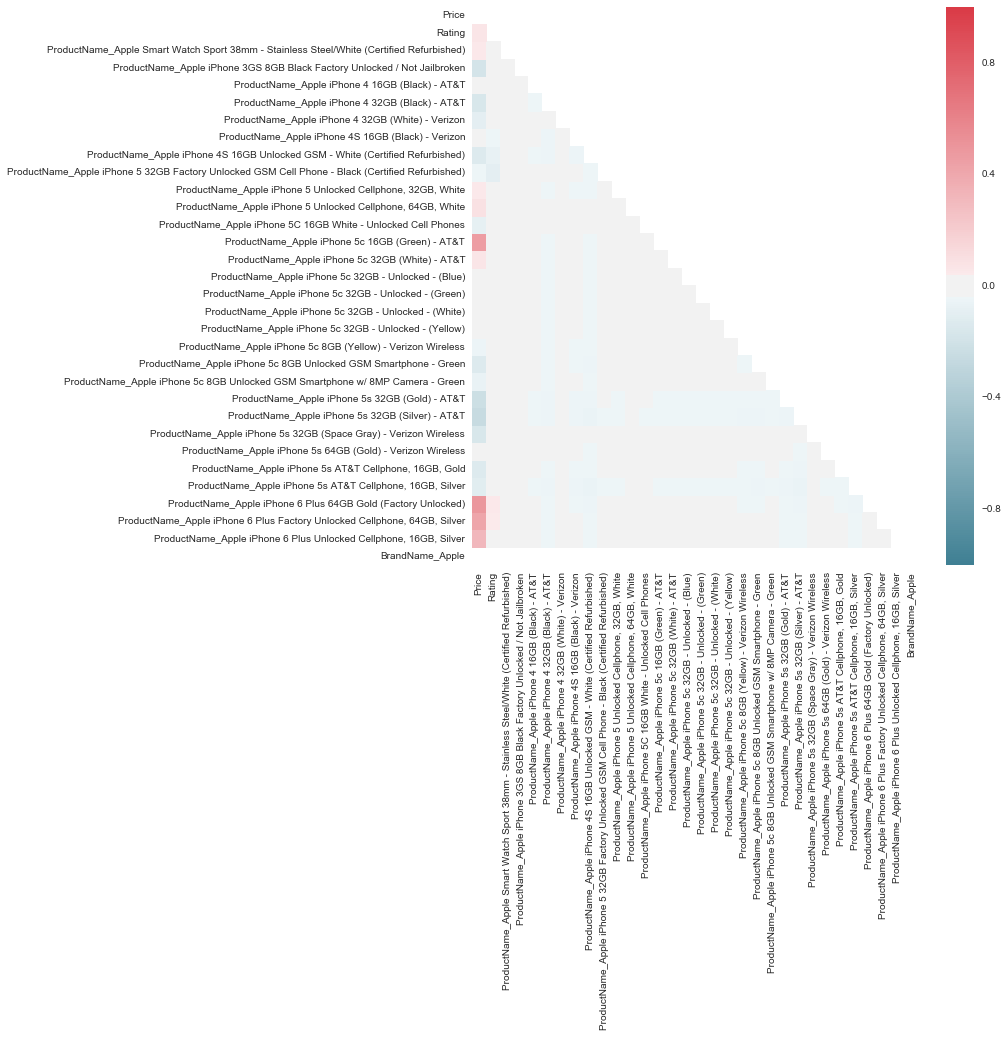

In [26]:
heat_map(mod_df_apple_corr)

Apple's flagship products are cetainly slightly costlier. 

# Who is able to charge more to the customers? Apple or Samsung?

In [27]:
apple_samsumg = ['Apple', 'Samsung']
df_top_ten = df.loc[df['BrandName'].isin(apple_samsumg)]
df_small = df_top_ten[['BrandName', 
               'Price', 
               'Rating'
              ]]
sns.pairplot(df_small, hue='BrandName', size=5)


I was expecting something different, but this is it! I have to admit, this simple method is not exactly creating a one to one comparison. 

# K Mean clustering use to find out important words in top ten Brands

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

def find_correlations_one_brand(company):
    df_one_company = df.loc[df['BrandName'].isin([company])]
    def corr_matrix_of_important_words(term_doc_mat, word_list, scores, n_features_to_keep):
        selector = SelectKBest(k=n_features_to_keep).fit(term_doc_mat, scores)
        informative_words_index = selector.get_support(indices=True)
        labels = [word_list[i] for i in informative_words_index]
        data = pd.DataFrame(term_doc_mat[:,informative_words_index].todense(), columns=labels)
        data['Score'] = df_one_company.Rating
        return(data.corr())

    def heat_map(corrs_mat):
        sns.set(style="white")
        f, ax = plt.subplots(figsize=(20, 20))
        mask = np.zeros_like(corrs_mat, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True 
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)
    vectorizer = CountVectorizer(max_features = 500, stop_words='english')
    term_doc_mat = vectorizer.fit_transform(df_one_company.Reviews.values.astype('U'))
    word_list = vectorizer.get_feature_names()

    corrs_large = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 60)
    #print(corrs_large.Score.sort_values(inplace=False)[:-1])
    corrs_small = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 15)
    heat_map(corrs_small)

for item in ['Apple']:
    print item
    find_correlations_one_brand(item)


Apple


# Funny to see those words :) 

# Lets make a word cloud of words appearing in the reviews of various companies: For speed, running this only on Apple vs Samsung 

Apple


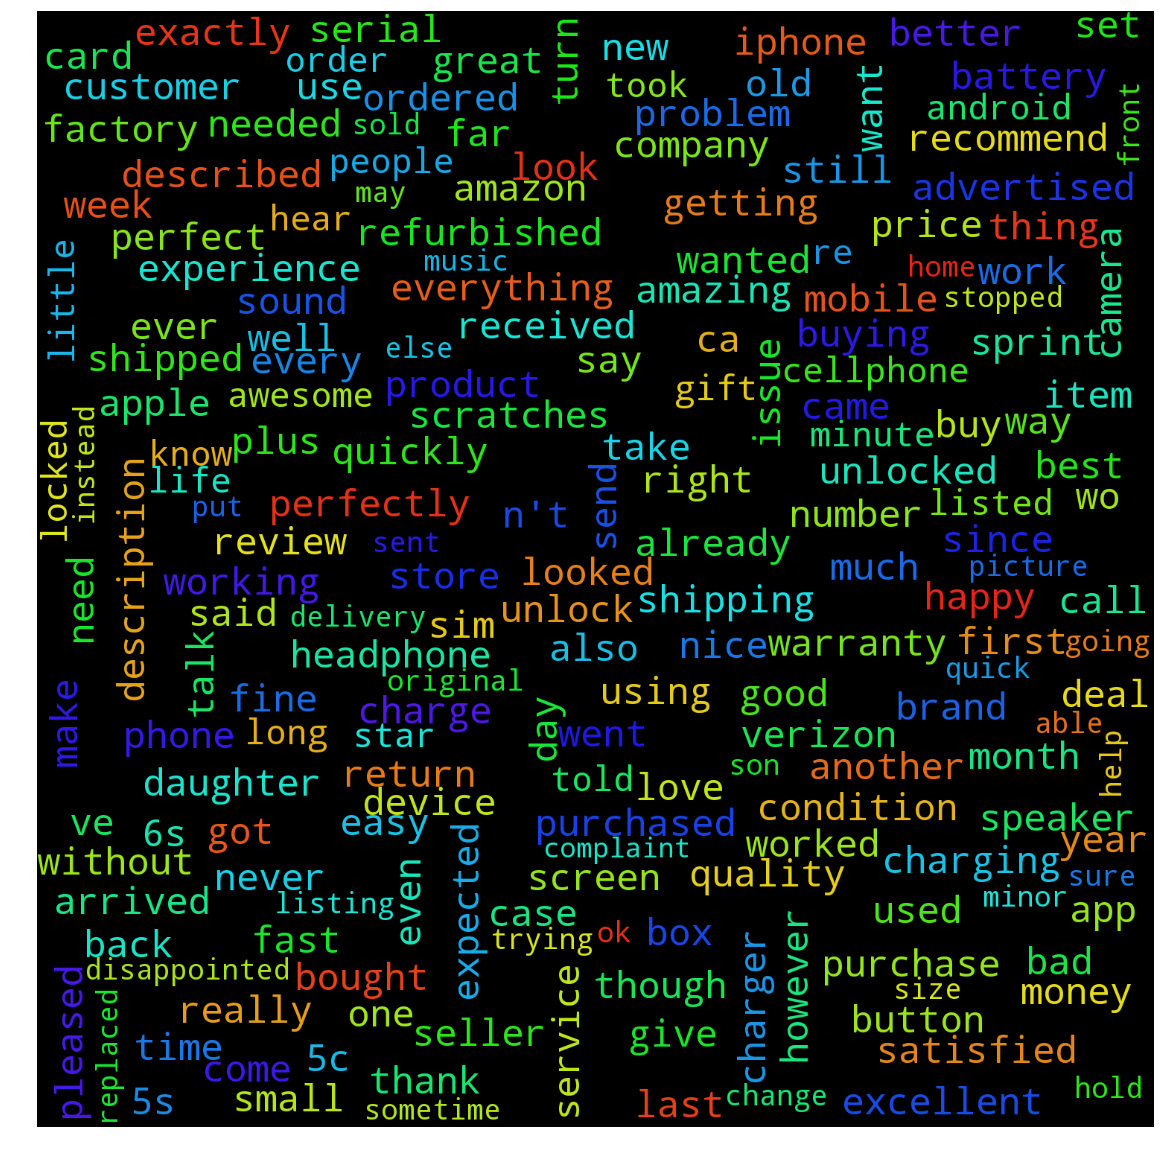

Samsung


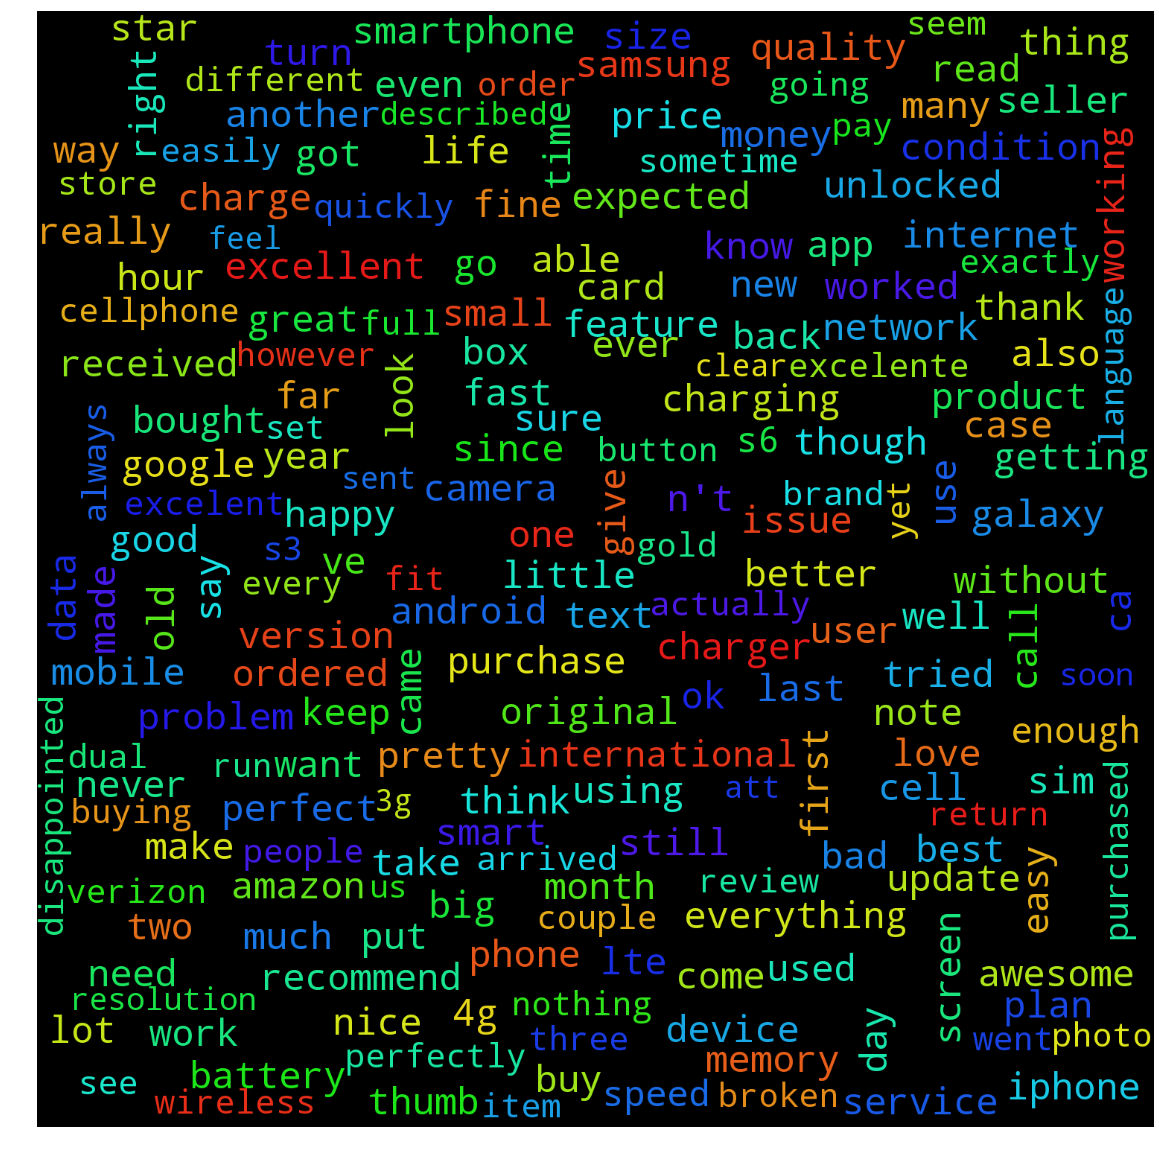

In [30]:
def create_word_cloud(one_company):
    try: 
        df_one_company = df.loc[df['BrandName'].isin([one_company])]
        df_one_company_sample = df_one_company.sample(frac=0.01)
        word_cloud_collection = ''
        for val in df_one_company_sample.Reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '
        wordcloud = WordCloud(max_font_size=50, width=1500, height=1500).generate(word_cloud_collection)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass
    
company_list = ['Apple', 'Samsung']
for i in company_list:
    print i
    create_word_cloud(i)

# Let us run machine learning algorithms on the text data

In [31]:
def review_to_wordlist( review, remove_stopwords=True ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))
    # 5. Return a list of words
    return(words)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [32]:
mod_df = df[df['Reviews'].isnull()==False]
mod_df = mod_df.sample(frac = 0.05)
train, test = train_test_split(mod_df, test_size = 0.3)

In [33]:
clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

C:\Users\rmalshe\AppData\Local\Continuum\Anaconda2\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
C:\Users\rmalshe\AppData\Local\Continuum\Anaconda2\lib\site-packages\bs4\__init__.py:207: UserWarning: "https://www.amazon.com/dp/B01CJU9BBM/ref=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind 

In [34]:
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)
fselect = SelectKBest(chi2 , k=10000)
train_features = fselect.fit_transform(train_features, train["Rating"])
test_features = fselect.transform(test_features)


# Machine learning

RandomForestClassifierG
('prediction accuracy: ', 0.65828902851619142)
Normalized confusion matrix
[[ 0.732  0.026  0.019  0.027  0.195]
 [ 0.461  0.118  0.026  0.079  0.317]
 [ 0.285  0.017  0.133  0.116  0.448]
 [ 0.103  0.021  0.013  0.159  0.704]
 [ 0.042  0.002  0.004  0.039  0.914]]
RandomForestClassifierE
('prediction accuracy: ', 0.6639278234251651)
Normalized confusion matrix
[[ 0.742  0.012  0.012  0.034  0.199]
 [ 0.458  0.12   0.024  0.045  0.353]
 [ 0.277  0.011  0.114  0.099  0.5  ]
 [ 0.101  0.013  0.017  0.156  0.713]
 [ 0.036  0.002  0.004  0.035  0.924]]
AdaBoostClassifier
('prediction accuracy: ', 0.62445625906234892)
Normalized confusion matrix
[[ 0.621  0.012  0.01   0.008  0.349]
 [ 0.458  0.031  0.052  0.039  0.419]
 [ 0.234  0.021  0.073  0.058  0.614]
 [ 0.101  0.01   0.021  0.065  0.804]
 [ 0.041  0.001  0.005  0.02   0.934]]
ExtraTreesClassifier
('prediction accuracy: ', 0.66118898018366357)
Normalized confusion matrix
[[ 0.738  0.016  0.018  0.032  0.196]
 [

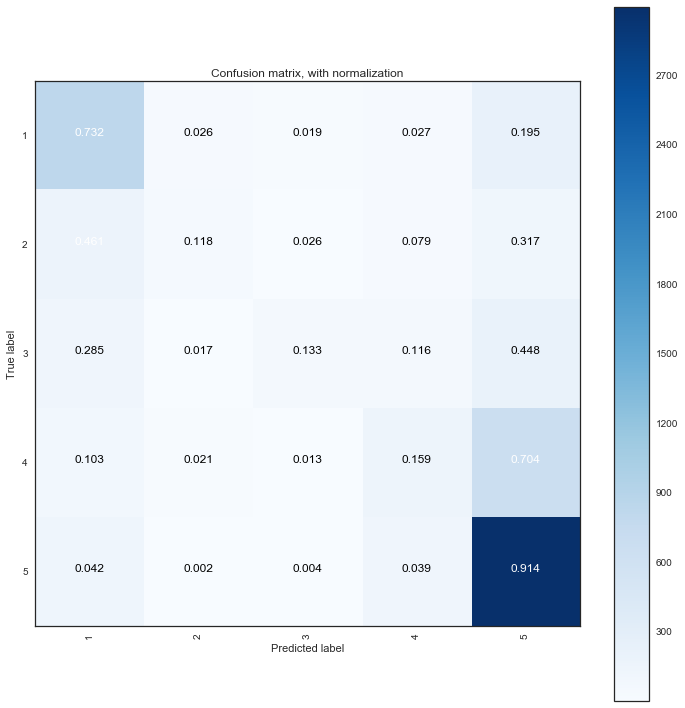

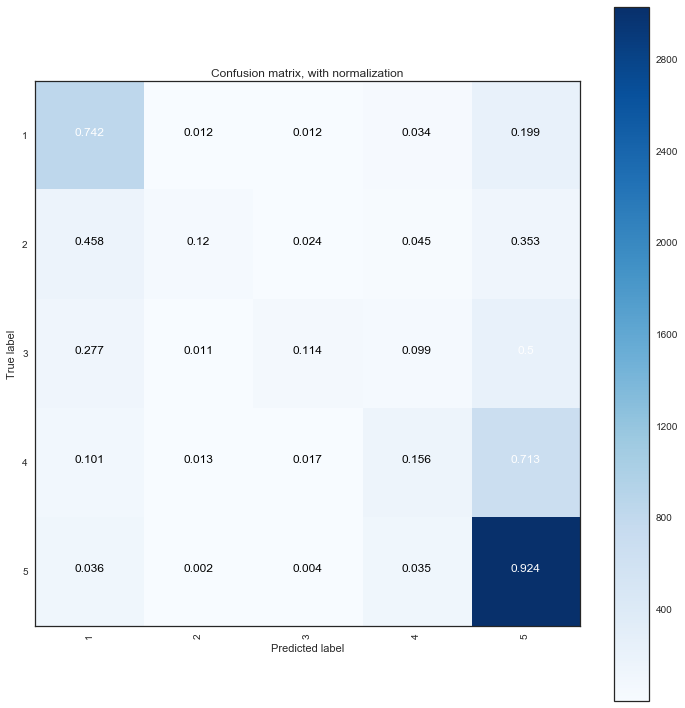

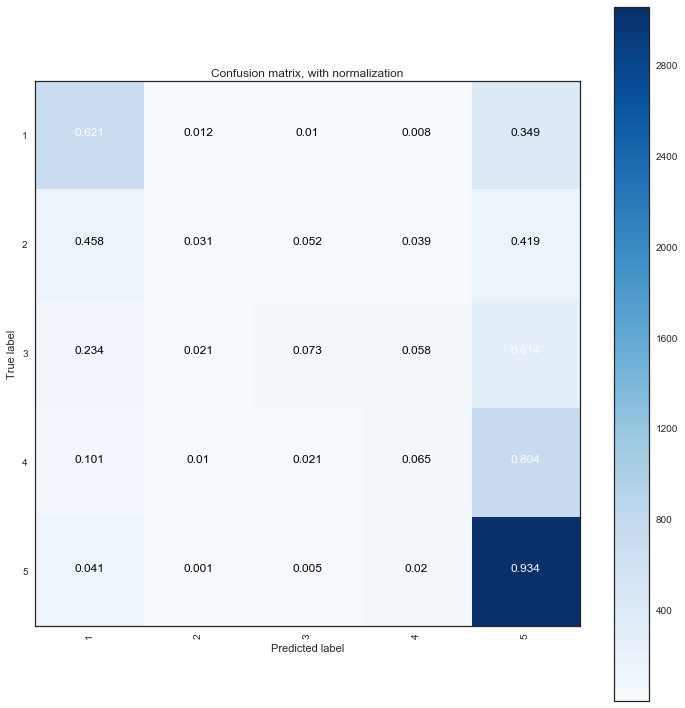

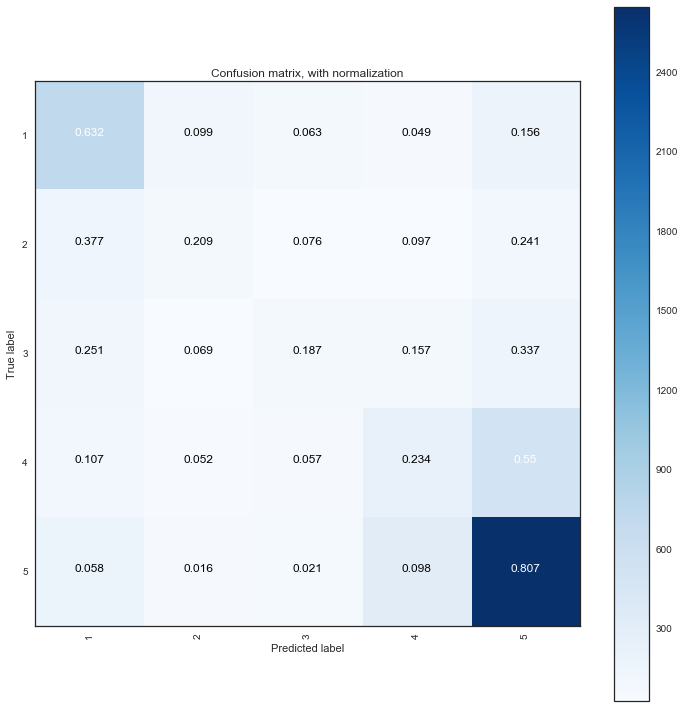

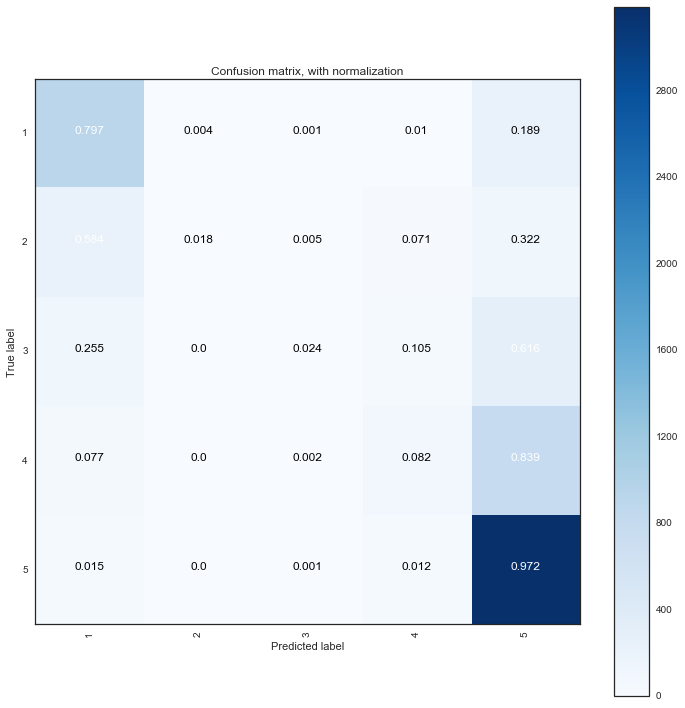

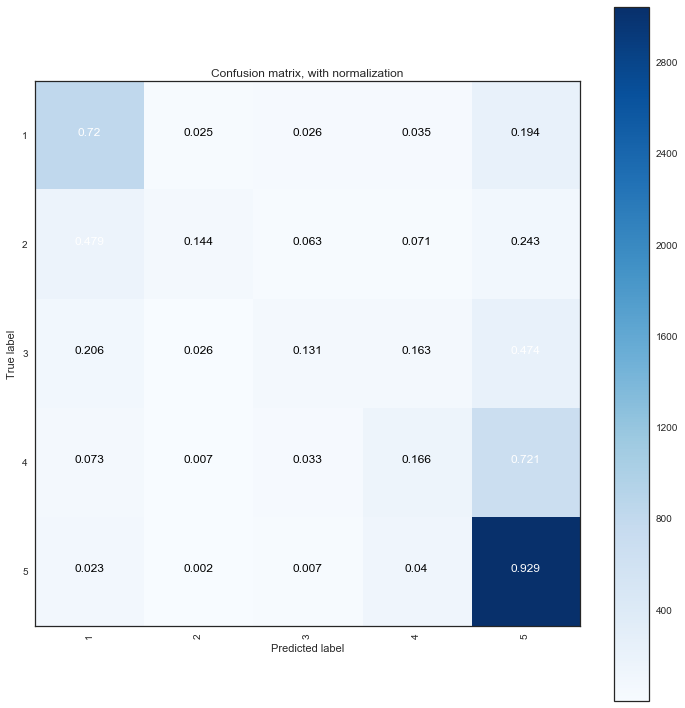

In [35]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('MultinomialNB', MultinomialNB(alpha=0.001)), 
               ('SGDClassifier', SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)),
               ('GradientBoostingClassifier', GradientBoostingClassifier()),
               
              ]
allscores = []
for name, classifier in classifiers:
    scores = []
    for i in range(1): # 3 runs
        print name

        classifier.fit( train_features, train["Rating"] )
        pred = classifier.predict( test_features.toarray() )
        print('prediction accuracy: ', accuracy_score(test['Rating'], pred))
        cnf_matrix = confusion_matrix(test['Rating'], pred)
        plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix, with normalization', normalize=True)


# MLP

A Multilayer Perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs. An MLP consists of multiple layers of nodes in a directed graph, with each layer fully connected to the next one. Except for the input nodes, each node is a neuron (or processing element) with a nonlinear activation function. (source Wikipedia)

In [36]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

batch_size = 32
nb_classes = 5

vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 1000, ngram_range = ( 1, 3 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

X_train = train_features.toarray()
X_test = test_features.toarray()

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(train['Rating']-1)
y_test = np.array(test['Rating']-1)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print("Training...")
model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.1, show_accuracy=True)

print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

print('prediction 6 accuracy: ', accuracy_score(test['Rating'], preds+1))

Using Theano backend.


('X_train shape:', (14482L, 1000L))
('X_test shape:', (6207L, 1000L))
Training...


C:\Users\rmalshe\AppData\Local\Continuum\Anaconda2\lib\site-packages\keras\models.py:654: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 13033 samples, validate on 1449 samples
Epoch 1/2
13033/13033 [==============================] - 3s - loss: 0.9807 - val_loss: 0.8938
Epoch 2/2
13033/13033 [==============================] - 3s - loss: 0.8473 - val_loss: 0.9023
Generating test predictions...
('prediction 6 accuracy: ', 0.67778314805864348)


# LSTM

In [41]:
max_features = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
maxlen = 80
batch_size = 32
nb_classes = 5

# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(train['Reviews'])
sequences_train = tokenizer.texts_to_sequences(train['Reviews'])
sequences_test = tokenizer.texts_to_sequences(test['Reviews'])

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

print('prediction 7 accuracy: ', accuracy_score(test['Rating'], preds+1))


TypeError: character mapping must return integer, None or unicode

# CNN

There are four main operations in the ConvNet :
Convolution Non Linearity (ReLU) Pooling or Sub Sampling Classification (Fully Connected Layer)
Convolution consists in applying different filters (here we chose to use 250 filters) on our input (here text). The main goal of the convolution step is to extract features from the input.
The different filters allow to apply different convolutions (mathematical convolutions) on our input. As a result we obtain N (N: number of filters) convolved input after the application of our convolved layer.
In order to add non linearity , we use Relu after the convolution layer.
After we have pooling. Spatial Pooling reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc.
The last step is the same as the MLP

In [40]:
nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 2

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))

def max_1d(X):
    return K.max(X, axis=1)

model.add(Lambda(max_1d, output_shape=(nb_filter,)))
model.add(Dense(hidden_dims)) 
model.add(Dropout(0.2)) 
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

print('prediction 8 accuracy: ', accuracy_score(test['Rating'], preds+1))

Build model...
Train...
Train on 14482 samples, validate on 6207 samples
Epoch 1/1
6207/6207 [==============================] - 2620s   
('Test score:', 0.42139670412206642)
('Test accuracy:', 0.81143869803649749)
Generating test predictions...
('prediction 8 accuracy: ', 0.52859674560979542)
